In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'D:\Data Analytics\Datasets\Extarcted\Credit Card Customer Churn Prediction\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber', 'CustomerId','Surname'], inplace = True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here, We need to transform the categorical data into numerical data. So, we use the pandas library to convert those.

In [15]:
df = pd.get_dummies(df,columns = ['Geography','Gender'], drop_first = True)

In [16]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(11,activation = 'relu', input_dim = 11)),
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [47]:
history = model.fit(X_train_scaled,y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 1.8106 - val_accuracy: 0.7775 - val_loss: 1.2479
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7514 - loss: 1.2483 - val_accuracy: 0.7700 - val_loss: 0.8702
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7664 - loss: 0.8990 - val_accuracy: 0.7750 - val_loss: 0.6878
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.7183 - val_accuracy: 0.7819 - val_loss: 0.5949
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7695 - loss: 0.6031 - val_accuracy: 0.7706 - val_loss: 0.5575
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7661 - loss: 0.5366 - val_accuracy: 0.7781 - val_loss: 0.5434
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.5271 - val_accuracy: 0.7912 - val_loss: 0.5529
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.5536 - val_accu

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3898 - val_accuracy: 0.8288 - val_loss: 0.4284
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4227 - val_accuracy: 0.8244 - val_loss: 0.4567
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8359 - loss: 0.4233 - val_accuracy: 0.8306 - val_loss: 0.4225
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.3965 - val_accuracy: 0.8300 - val_loss: 0.4269
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8406 - loss: 0.3747 - val_accuracy: 0.8306 - val_loss: 0.4253
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.3614 - val_accuracy: 0.8344 - val_loss: 0.4345
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3859 - val_accuracy: 0.8344 - val_loss: 0.4564
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.3765 - val_accuracy:

In [48]:
model.layers[0].get_weights()

[array([[-0.01201864, -0.23350191, -0.2154884 , -0.097471  ,  0.20612495,
         -0.07992981, -0.07938927, -0.0731382 ,  0.13994043,  0.03120952,
         -0.14750996],
        [ 0.13896473, -0.44416252, -0.4085614 , -0.11372221,  0.10042895,
          0.29965442, -0.05872241,  0.5551564 , -0.42320353, -0.2586001 ,
          0.29852265],
        [ 0.07071983,  0.17715971,  0.09025283,  0.17853412,  0.1690379 ,
          0.03372917,  0.07116676,  0.18258904, -0.34092006, -0.02429664,
         -0.24045974],
        [ 0.28295043, -0.11946829, -0.3403461 ,  0.01557517, -0.17267586,
         -0.27833673, -0.5796612 , -0.44554156, -0.13927075,  0.20814086,
          0.46836618],
        [-0.628441  , -0.03845592,  0.0030655 ,  0.577948  ,  0.4042869 ,
         -0.4597725 , -0.35224977, -0.2157374 ,  0.37669057,  0.10106775,
          0.55388796],
        [ 0.38985142, -0.02790345, -0.19239813,  0.02305077, -0.11299358,
         -0.2507517 ,  0.0235306 , -0.19722247,  0.12160741, -0.0699500

In [49]:
model.layers[1].get_weights()

[array([[ 0.06510385, -0.41449758,  0.2121873 , -0.2471118 ,  0.09078598,
         -0.23592561, -0.11419304,  0.12886165, -0.29586828, -0.5161428 ,
         -0.2906909 ],
        [ 0.2487051 , -0.15649492, -0.3172314 ,  0.0123818 ,  0.19585891,
         -0.51368934,  0.3693443 ,  0.14724931,  0.42988884,  0.16453636,
          0.03912241],
        [ 0.2653333 ,  0.25721887, -0.00806964,  0.07455194,  0.19938701,
         -0.25771585,  0.37300053, -0.26863316, -0.15913892,  0.26180026,
          0.42931032],
        [ 0.2905864 ,  0.28711993, -0.38682   , -0.1418279 ,  0.34424207,
          0.46845284, -0.2596774 ,  0.39568368, -0.6674888 , -0.3382769 ,
         -0.1037134 ],
        [ 0.06798514,  0.3203418 , -0.11510821,  0.01420995,  0.19277117,
          0.33586544, -0.34316027,  0.23483309, -0.45801914,  0.15525767,
          0.05616515],
        [-0.3452651 , -0.0184025 ,  0.59699845, -0.06930712,  0.12374858,
         -0.2166822 ,  0.1983162 , -0.46694225,  0.5192857 , -0.4717704

In [50]:
model.layers[2].get_weights()

[array([[ 0.2527591 ],
        [-0.3987411 ],
        [ 0.53623664],
        [-0.57734853],
        [-0.04183054],
        [ 0.7714372 ],
        [-0.34013543],
        [-0.05391119],
        [ 0.22822785],
        [-0.45555952],
        [ 0.53562707]], dtype=float32),
 array([0.0585284], dtype=float32)]

In [51]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [52]:
y_pred = np.where(y_log>0.5,1,0)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of the data is:")
print(accuracy_score(y_test,y_pred))

Accuracy Score of the data is:
0.851


In [54]:
history.history

{'accuracy': [0.7662500143051147,
  0.7582812309265137,
  0.7720312476158142,
  0.7754687666893005,
  0.7651562690734863,
  0.7699999809265137,
  0.7901562452316284,
  0.7912499904632568,
  0.7945312261581421,
  0.7778124809265137,
  0.7774999737739563,
  0.7951562404632568,
  0.8009374737739563,
  0.8026562333106995,
  0.8070312738418579,
  0.8081250190734863,
  0.8095312714576721,
  0.8089062571525574,
  0.8115624785423279,
  0.8125,
  0.7940624952316284,
  0.8104687333106995,
  0.8123437762260437,
  0.8129687309265137,
  0.8139062523841858,
  0.8162500262260437,
  0.8076562285423279,
  0.8140624761581421,
  0.8168749809265137,
  0.8170312643051147,
  0.8162500262260437,
  0.8182812333106995,
  0.819531261920929,
  0.8174999952316284,
  0.8167187571525574,
  0.8062499761581421,
  0.8142187595367432,
  0.8178125023841858,
  0.8176562786102295,
  0.8189062476158142,
  0.8206250071525574,
  0.8215625286102295,
  0.8224999904632568,
  0.824999988079071,
  0.8248437643051147,
  0.82859373

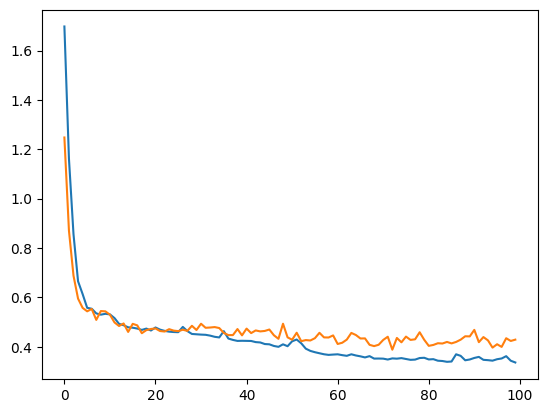

In [56]:
# This graph will tells us about whether there is ooverfitting or not.
# From this graph and for this dataset there is no overfitting.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

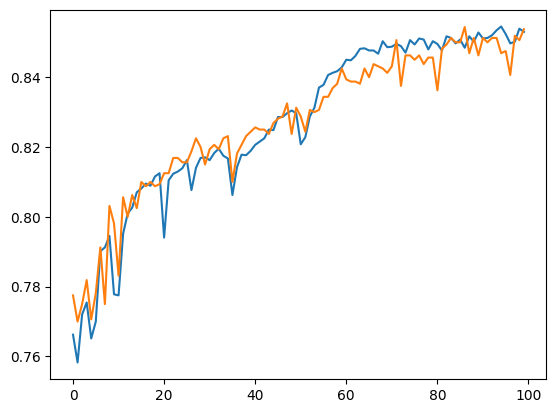

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])